### 数据去重

In [91]:
import pandas as pd

msg_data = pd.read_csv("./data/message80W1.csv")
print("记录去重前:{}".format(msg_data.shape))
msg_data = msg_data.drop_duplicates()
print("记录去重后:{}".format(msg_data.shape))

记录去重前:(2000, 2)
记录去重后:(1999, 2)


### 正则匹配(替换消息文本)

In [92]:
import re

def replace_messages(text):
    return re.sub(r'[^\u4E00-\u9FD5]', '', text, count=1000)

print(msg_data)
re_msg_data = pd.concat([msg_data["label"],msg_data["message"].apply(replace_messages)], axis=1)
print(re_msg_data)

      label                                            message
0         0                                 工作时间：周末两天待遇：每月800元
1         0                              这会儿干脆跟着花千骨去看“九穗儿”葡萄园了
2         0                                      华为Nexus手机概念图赏
3         0                                    盐城历史文化名人宋曹第21世孙
4         0                                    为深入推进工程质量治理两年行动
...     ...                                                ...
1995      1  亲爱的姐，三八妇女节活动如下：x.三八节原价眼部xxxx元xx次，现秒杀价xxxx次xx次x...
1996      1  x月x号-x号就到苏宁普宁商品城店抢美的限量出售。错过了在等x年 美的空调x匹挂机  xxx...
1997      1  亲们，肌研迎新年活动，抢货价xxx元x件（极润保湿化妆水，极润保湿乳液），活动只限x月x号x...
1998      1  南河利州菜市场正大门二楼（龙都酒店对面）故乡炊烟农家饭馆出租或对外转让，价格从优，有意者请前...
1999      1  感谢您致电“国投滨江印象”，老城绝版一线江景华宅，准现房、低密度、大景观、高配套、超高性价比...

[1999 rows x 2 columns]
      label                                            message
0         0                                      工作时间周末两天待遇每月元
1         0                                这会儿干脆跟着花千骨去看九穗儿葡萄园了
2         0                   

### 消息分词

In [93]:
import jieba

# 将文本进行分词
def jieba_segmentation(text):
    # 精确模式分词
    words = jieba.lcut(text, cut_all=False)
    return words

cut_re_msg_data = pd.concat([re_msg_data["label"],re_msg_data["message"].apply(jieba_segmentation)], axis=1)
print(cut_re_msg_data)


      label                                            message
0         0                        [工作, 时间, 周末, 两天, 待遇, 每月, 元]
1         0            [这会儿, 干脆, 跟着, 花千骨, 去, 看, 九, 穗儿, 葡萄园, 了]
2         0                                   [华为, 手机, 概念图, 赏]
3         0                        [盐城, 历史, 文化名人, 宋, 曹, 第, 世孙]
4         0                      [为, 深入, 推进, 工程质量, 治理, 两年, 行动]
...     ...                                                ...
1995      1  [亲爱, 的, 姐, 三八妇女节, 活动, 如下, 三八节, 原价, 眼部, 元次现, 秒,...
1996      1  [月, 号, 号, 就, 到, 苏宁, 普宁, 商品, 城店, 抢, 美的, 限量, 出售,...
1997      1  [亲们, 肌研, 迎新年, 活动, 抢, 货价, 元件, 极润, 保湿, 化妆水, 极润, ...
1998      1  [南河, 利州, 菜市场, 正, 大门, 二楼, 龙, 都, 酒店, 对面, 故乡, 炊烟,...
1999      1  [感谢您, 致电, 国投, 滨江, 印象, 老城, 绝版, 一线, 江景, 华宅, 准现房,...

[1999 rows x 2 columns]


### 去除停用词

In [94]:
with open('./data/stopword.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

stopwords = [x[:-1].rstrip() for x in lines]
stopwords[0] = ' '

def remove_stopword(textlist, stoplist = stopwords):
    rm_text = [x for x in textlist if x not in stoplist]
    return rm_text

final_msg_data = pd.concat([cut_re_msg_data["label"],cut_re_msg_data["message"].apply(remove_stopword)], axis=1)

print(final_msg_data)


      label                                            message
0         0                        [工作, 时间, 周末, 两天, 待遇, 每月, 元]
1         0                             [干脆, 跟着, 花千骨, 穗儿, 葡萄园]
2         0                                   [华为, 手机, 概念图, 赏]
3         0                           [盐城, 历史, 文化名人, 宋, 曹, 世孙]
4         0                                 [推进, 工程质量, 治理, 两年]
...     ...                                                ...
1995      1  [亲爱, 姐, 三八妇女节, 活动, 三八节, 原价, 眼部, 元次现, 秒, 杀价, 次次...
1996      1  [号, 号, 苏宁, 普宁, 商品, 城店, 抢, 美的, 限量, 出售, 错过, 年, 美...
1997      1  [亲们, 肌研, 迎新年, 活动, 抢, 货价, 元件, 极润, 保湿, 化妆水, 极润, ...
1998      1  [南河, 利州, 菜市场, 正, 大门, 二楼, 龙, 酒店, 对面, 故乡, 炊烟, 农家...
1999      1  [感谢您, 致电, 国投, 滨江, 印象, 老城, 绝版, 一线, 江景, 华宅, 准现房,...

[1999 rows x 2 columns]


### 模型拟合

In [95]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_msg_data, test_size = 0.3)

print('原始数据维度为：',final_msg_data.shape)
print('训练数据维度为：',train.shape)
print('测试数据维度为：',test.shape)


原始数据维度为： (1999, 2)
训练数据维度为： (1399, 2)
测试数据维度为： (600, 2)


In [96]:
train_data = train['message']
test_data = test['message']
train_y = train['label']
test_y = test['label']

print(train_data)
print(test_data)

1463    [你好, 乐居华庭, 装饰, 公司, 小皇, 公司, 实行, 七大, 优惠活动, 先, 装修...
290                        [水在, 胃, 停留, 分钟, 小肠, 吸收, 进, 血液]
79                              [喝, 凉水, 胖, 质疑, 吃素, 胖, 真的]
419                 [电钻, 声, 公交车, 声卖, 水果, 小贩, 吆喝声, 声声, 入耳]
1115    [你好, 成都, 专业, 提供, 兼职, 礼仪模特, 发单, 举牌, 促销, 人员, 公司,...
                              ...                        
915                                [天, 时间, 里, 已有, 多家, 平台]
877                          [歌词, 桑, 恋爱, 裁判, 周刊, 第六位, 恭喜]
1500            [发财, 现有, 行业, 正规, 发票, 钟, 经理, 互惠互利, 合作, 共赢]
860      [浙江, 东南部, 沿海, 福建, 东部, 沿海, 广东, 东部, 沿海, 级, 瞬时, 大风]
1434    [致电, 汕头市, 光明, 嘉盛, 影城, 本影, 城是, 汕头, 潮南, 地区, 首家, ...
Name: message, Length: 1399, dtype: object
200                [一号线, 南京站, 一号, 出口, 外面, 电子屏, 时间, 太, 不准]
117                            [南京, 气象预报, 全市, 阴有, 阵雨, 雷雨]
1267    [三月, 女人, 关爱, 卡, 限时, 购此, 卡集, 意外, 女人, 疾病, 住院, 津贴...
862                            [法律, 制定, 执行, 有人, 非, 偏激, 成]
132                                                  [最先]
                             

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# 转化词频向量函数
vectorizer = CountVectorizer()    # 转化词频向量函数
train_cv = vectorizer.fit_transform(train_data.apply(lambda x: ' '.join(x if isinstance(x,list) else eval(x))))    # 对训练集执行词频转换

# 转化tf-idf权重向量函数
transformer = TfidfTransformer()  # 转化tf-idf权重向量函数
tfidf_train = transformer.fit_transform(train_cv.toarray())  # 进一步转成tf-idf权重向量

print('词频结果：\n',train_cv)   #查看词频结果
print('TF-IDF结果：\n',tfidf_train)  #查看词的权重

词频结果：
   (0, 883)	1
  (0, 517)	1
  (0, 6191)	1
  (0, 1119)	2
  (0, 2866)	1
  (0, 2723)	1
  (0, 128)	1
  (0, 810)	1
  (0, 6186)	1
  (0, 743)	1
  (0, 2018)	1
  (0, 928)	1
  (0, 1892)	1
  (0, 5427)	1
  (0, 6811)	1
  (0, 4575)	1
  (0, 3831)	1
  (1, 4562)	1
  (1, 975)	1
  (1, 1320)	1
  (1, 2869)	1
  (1, 1973)	1
  (1, 6143)	1
  (2, 1257)	1
  (2, 6393)	1
  :	:
  (1397, 347)	2
  (1397, 5400)	1
  (1397, 2421)	1
  (1398, 5948)	1
  (1398, 4949)	1
  (1398, 621)	1
  (1398, 7097)	1
  (1398, 5331)	1
  (1398, 6284)	1
  (1398, 2205)	1
  (1398, 7306)	1
  (1398, 7150)	1
  (1398, 4608)	1
  (1398, 1031)	1
  (1398, 2099)	1
  (1398, 3255)	2
  (1398, 4269)	1
  (1398, 2251)	1
  (1398, 4607)	1
  (1398, 4889)	1
  (1398, 7248)	1
  (1398, 2898)	1
  (1398, 5234)	1
  (1398, 3431)	1
  (1398, 6233)	1
TF-IDF结果：
   (0, 6811)	0.26928629124687203
  (0, 6191)	0.16824836291344755
  (0, 6186)	0.17646928737959994
  (0, 5427)	0.26928629124687203
  (0, 4575)	0.26928629124687203
  (0, 3831)	0.2548266125852979
  (0, 2866)	0.26928

In [98]:
# 按训练集的规则处理测试集数据
vectorizer1 = CountVectorizer(vocabulary=vectorizer.vocabulary_)  #按训练集规则的转换
test_cv = vectorizer1.fit_transform(test_data.apply(lambda x: ' '.join(x if isinstance(x,list) else eval(x))))            #对测试集执行词频转换
tfidf_test = transformer.fit_transform(test_cv.toarray())    # 进一步转成tf-idf权重向量
print('词频结果：\n',test_cv)   #查看词频结果
print('TF-IDF结果：\n',tfidf_test)  #查看词的权重

词频结果：
   (0, 32)	1
  (0, 2323)	1
  (0, 4067)	1
  (1, 1074)	1
  (1, 1612)	1
  (2, 137)	1
  (2, 195)	1
  (2, 1021)	1
  (2, 1022)	1
  (2, 1164)	1
  (2, 2424)	1
  (2, 2506)	2
  (2, 3040)	1
  (2, 3420)	1
  (2, 5251)	1
  (2, 5677)	1
  (2, 6420)	1
  (2, 7030)	1
  (3, 1373)	1
  (3, 3544)	1
  (3, 4672)	1
  (5, 990)	1
  (5, 1510)	1
  (6, 2728)	1
  (6, 6738)	1
  :	:
  (595, 808)	1
  (595, 1068)	1
  (595, 1918)	1
  (595, 2062)	1
  (595, 2673)	1
  (595, 3106)	1
  (595, 3175)	1
  (595, 3999)	1
  (595, 4456)	1
  (595, 4863)	1
  (596, 2235)	1
  (596, 4822)	1
  (596, 5211)	1
  (597, 1496)	1
  (597, 3492)	1
  (597, 3783)	1
  (597, 6286)	1
  (599, 49)	1
  (599, 168)	1
  (599, 658)	1
  (599, 687)	1
  (599, 914)	1
  (599, 4706)	1
  (599, 5087)	1
  (599, 6302)	1
TF-IDF结果：
   (0, 4067)	0.42471553687322916
  (0, 2323)	0.6401627577180997
  (0, 32)	0.6401627577180997
  (1, 1612)	0.647105790462086
  (1, 1074)	0.7624002203242328
  (2, 7030)	0.23840417843528244
  (2, 6420)	0.2851174736121149
  (2, 5677)	0.28511747

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# 模型构建
model_nb = MultinomialNB(alpha=1.0e-10).fit(tfidf_train,train_y)   # 构建多项式贝叶斯模型
res = model_nb.predict(tfidf_train)    # 模型预测
print('混淆矩阵:\n',confusion_matrix(train_y, res))      # 混淆矩阵
print('模型训练正确率:',model_nb.score(tfidf_train,train_y))  #训练的模型的得分
print('多项式贝叶斯模型的性能报告: \n',classification_report(train_y, res))

#模型评估
res_nb = model_nb.predict(tfidf_test)   # 模型预测
print('模型验证正确率:',model_nb.score(tfidf_test,test_y)) #模型验证的得分
print('混淆矩阵如下:\n',confusion_matrix(test_y, res_nb) )   # 混淆矩阵
classification_report(test_y, res_nb)       # 结果报告
print('多项式贝叶斯模型的性能报告: \n',classification_report(test_y, res_nb))

混淆矩阵:
 [[706   4]
 [  1 688]]
模型训练正确率: 0.9964260185847034
多项式贝叶斯模型的性能报告: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       710
           1       0.99      1.00      1.00       689

    accuracy                           1.00      1399
   macro avg       1.00      1.00      1.00      1399
weighted avg       1.00      1.00      1.00      1399

模型验证正确率: 0.8766666666666667
混淆矩阵如下:
 [[229  61]
 [ 13 297]]
多项式贝叶斯模型的性能报告: 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       290
           1       0.83      0.96      0.89       310

    accuracy                           0.88       600
   macro avg       0.89      0.87      0.88       600
weighted avg       0.89      0.88      0.88       600



### 绘制词云图

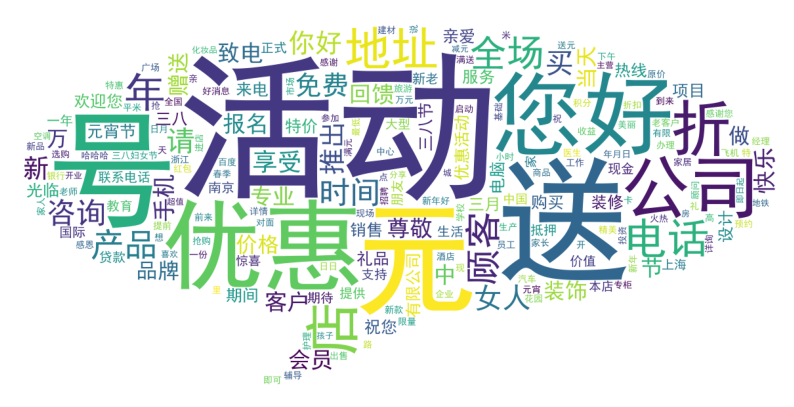

In [100]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud # 绘制词云图

def word_count(word_data):
    # 将所有 message 列的列表合并为一个大列表
    all_words = [word for message_words in word_data for word in message_words]

    # 使用 Counter 统计词频
    word_counts = Counter(all_words)
    return word_counts


# 绘制词云图
def wordcloud_plot(mask_pic=None,count=None):
    plt.figure(figsize=(10,6))
    pic = plt.imread(mask_pic)
    wc = WordCloud(
        font_path = 'C:\\Windows\\Fonts\\simhei.ttf',
        background_color = 'white', ##设置背景颜色
        mask = pic
        ) ##设置背景图片
    wc2 = wc.fit_words(count)
    plt.imshow(wc2)
    plt.axis('off')##关闭坐标轴
    plt.show()

wordcloud_plot("./data/duihuakuan.jpg",word_count(final_msg_data["message"]))